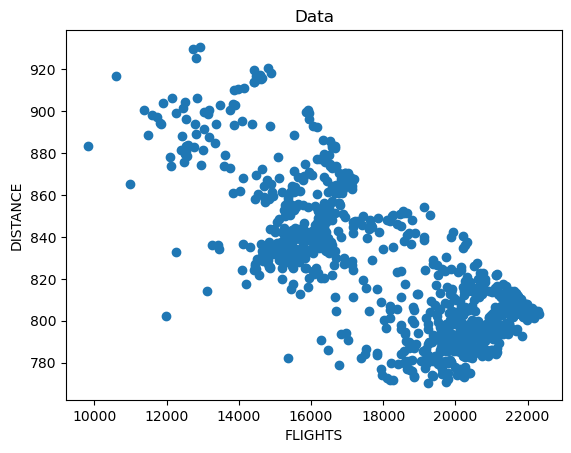

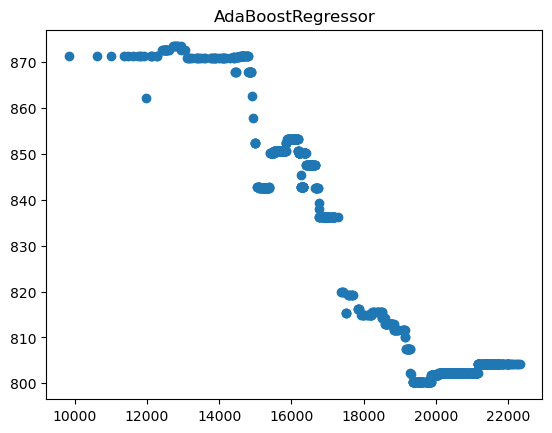

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor
import matplotlib.pyplot as plt

col_id = ["fl_date","cancelled","flights","distance"]
df = pd.read_csv('/kaggle/input/mond-6-8labs/Daily-stats.xlsx',sep=';')

y = df.DISTANCE
X = df[["FLIGHTS"]]

plt.scatter(X,y)
plt.title('Data')
plt.ylabel('DISTANCE')
plt.xlabel('FLIGHTS')
plt.show()

reg = AdaBoostRegressor(n_estimators=100, random_state=42)

reg.fit(X,y)
y = pd.Series(np.array(reg.predict(X)).ravel())


plt.title('AdaBoostRegressor')
plt.scatter(X, y)
plt.show()

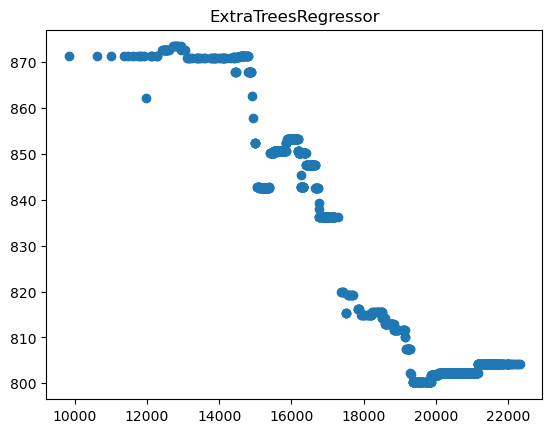

In [2]:
reg = ExtraTreesRegressor(n_estimators=100, random_state=42)

reg.fit(X,y)
y = pd.Series(np.array(reg.predict(X)).ravel())


plt.title('ExtraTreesRegressor')
plt.scatter(X, y)
plt.show()

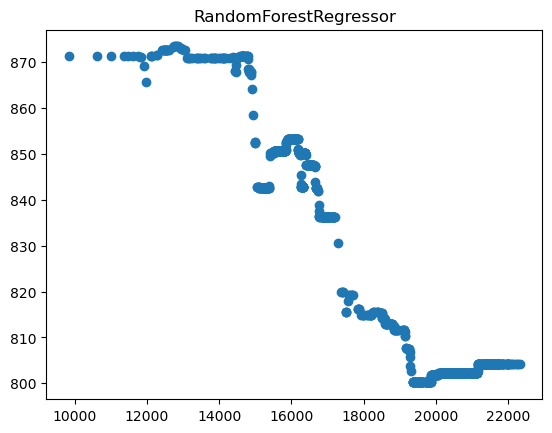

In [3]:
reg = RandomForestRegressor(n_estimators=100, random_state=42)

reg.fit(X,y)
y = pd.Series(np.array(reg.predict(X)).ravel())


plt.title('RandomForestRegressor')
plt.scatter(X, y)
plt.show()

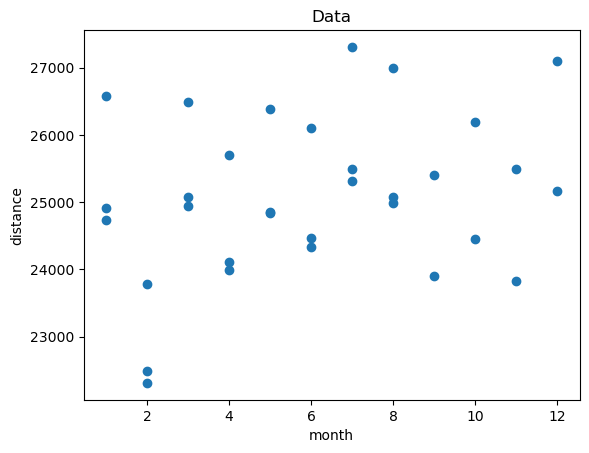

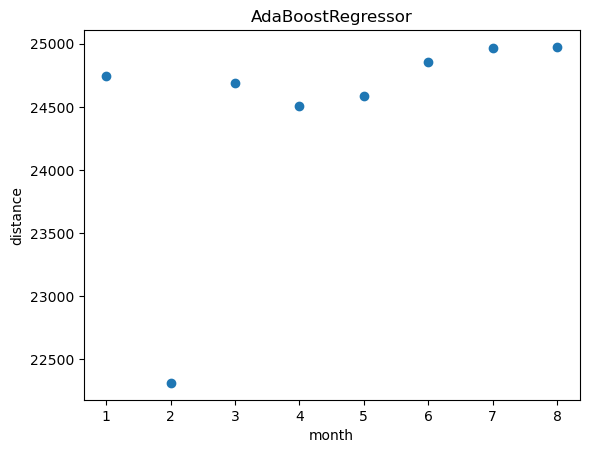

In [4]:
df = pd.read_csv('/kaggle/input/mond-6-8labs/Monthly-stats.csv')

X_train = df[df.year < 2019][['year','month']]

y_train = df[df.year < 2019]['distance']

X_test = df[df.year == 2019][['year','month']]
y_test = df[df.year == 2019]['distance']

plt.scatter(df['month'],df['distance'])
plt.title('Data')
plt.ylabel('distance')
plt.xlabel('month')
plt.show()


reg = AdaBoostRegressor(n_estimators=100, random_state=42)

reg.fit(X_train,y_train)
y_ada = pd.Series(np.array(reg.predict(X_test)).ravel())

plt.title('AdaBoostRegressor')
plt.ylabel('distance')
plt.xlabel('month')
plt.scatter(X_test['month'], y_ada)
plt.show()

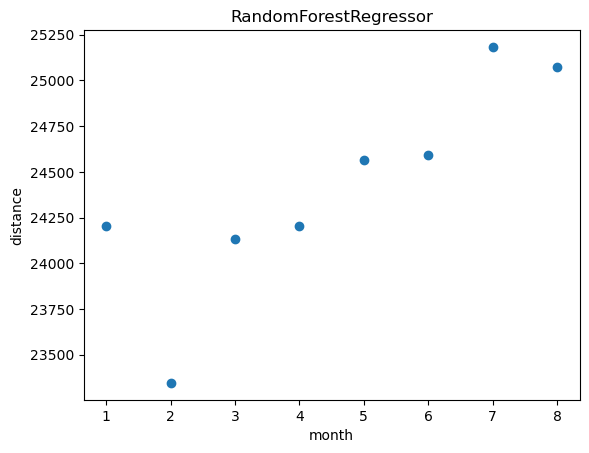

In [5]:
reg = RandomForestRegressor(n_estimators=100, random_state=42)

reg.fit(X_train,y_train)
y_rf = pd.Series(np.array(reg.predict(X_test)).ravel())

plt.title('RandomForestRegressor')
plt.scatter(X_test['month'], y_rf)
plt.ylabel('distance')
plt.xlabel('month')
plt.show()

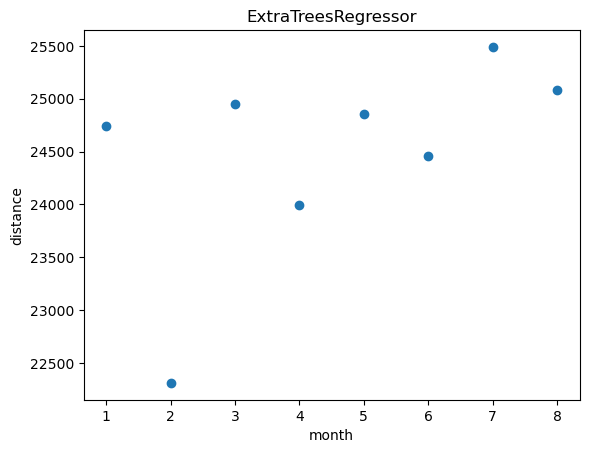

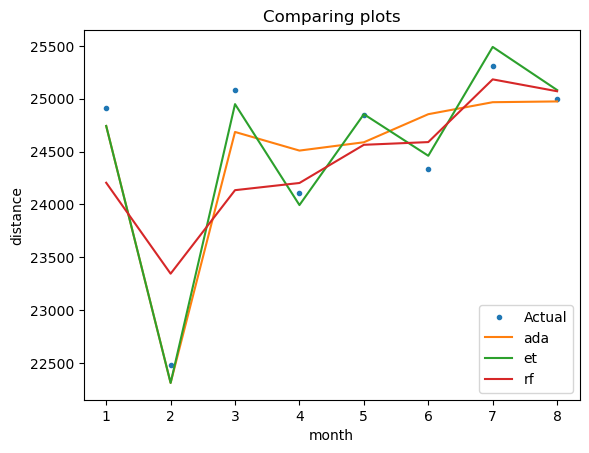

In [6]:
reg = ExtraTreesRegressor(n_estimators=100, random_state=42)

reg.fit(X_train,y_train)
y_et = pd.Series(np.array(reg.predict(X_test)).ravel())

plt.title('ExtraTreesRegressor')
plt.ylabel('distance')
plt.xlabel('month')
plt.scatter(X_test['month'], y_et)
plt.show()

reg = RandomForestRegressor(n_estimators=100, random_state=42)

reg.fit(X_train,y_train)
y_rt = pd.Series(np.array(reg.predict(X_test)).ravel())

plt.title('Comparing plots')
plt.plot(X_test['month'], y_test, ".", label="Actual")
plt.plot(X_test['month'], y_ada , label="ada")
plt.plot(X_test['month'], y_et , label="et")
plt.plot(X_test['month'], y_rf, label="rf")
plt.legend()
plt.ylabel('distance')
plt.xlabel('month')
plt.show()